### Computer Vision

## Computer Vision Libraries in Pytorch
* torchvision- Pytorch's Computer vision library.
* torchvision.datasets- get datasets and data loading functions for computer vision here 
* torchvision.models - get pretrained computer vision models that you can leveragae for your own problems
* torchvision.transforms - functions for manipulating your vision data to be suitable for used with an ML model.
* torch.utiles.data.Dataset- Base Data class for Pytorch.
* torch.utiles.data.DataLoader- creates a python iterable over an dataset

In [3]:
import torch 
from torch import nn 

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 
print(torch.__version__)
print(torchvision.__version__)


2.1.2+cu118
0.16.2+cu118


### Getting a Dataset

##### Fashion MNIST Datset.

In [4]:
# Setup training data
train_data=datasets.FashionMNIST(root="data",train=True,transform=ToTensor(),target_transform=None,download=True)
test_data=datasets.FashionMNIST(root="data",train=False,transform=ToTensor(),target_transform=None,download=True)

100%|██████████| 26421880/26421880 [00:12<00:00, 2146873.95it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 185251.52it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1095860.92it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 9420714.22it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [5]:
len(train_data),len(test_data)

(60000, 10000)

In [6]:
### See the First Training Example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
# Check the shape of our image 
print(image.shape,label)


torch.Size([1, 28, 28]) 9


### Visualizing our data

image_shape=>torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

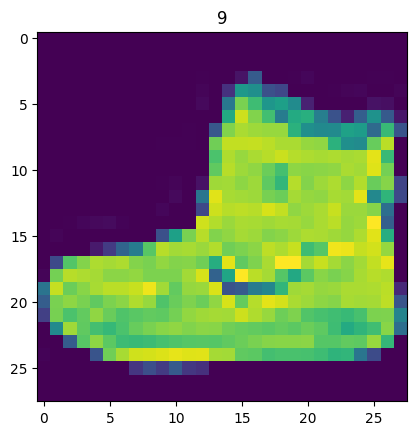

In [10]:
image,label=train_data[0]
print(f"image_shape=>{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

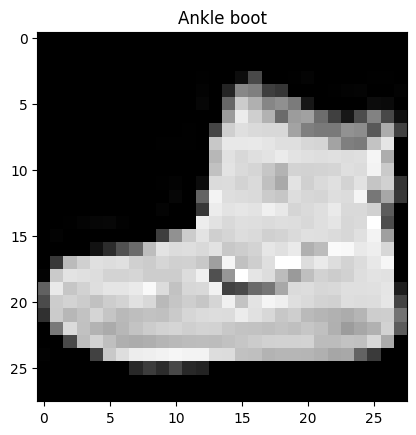

In [11]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);

In [12]:
# Plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    print(random_idx)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


<Figure size 900x900 with 0 Axes>

In [13]:
train_data


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

## 2. Prepare DataLoader
Right now,our data is in the form of Pytorch datasets.DataLoader Turns our dataset into Python iterable.More Specifically,we want to turn our data into batches.


In [14]:
from torch.utils.data import DataLoader
## Setup the batch size hyperparameter
Batch_size=32

# Turn datasets into iterables
train_dataloader=DataLoader(dataset=train_data,batch_size=Batch_size,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=Batch_size,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1e15765b890>,
 <torch.utils.data.dataloader.DataLoader at 0x1e152d13990>)

In [15]:
# Let's checkout what we've created
print(f"DataLoaders:{train_dataloader,test_dataloader}")
print(f"Length of the DataLoader: {len(train_dataloader)}batches of {Batch_size}...")
print(f"Length of the Test_dataloader: {len(test_dataloader)}batches of {Batch_size}...")


DataLoaders:(<torch.utils.data.dataloader.DataLoader object at 0x000001E15765B890>, <torch.utils.data.dataloader.DataLoader object at 0x000001E152D13990>)
Length of the DataLoader: 1875batches of 32...
Length of the Test_dataloader: 313batches of 32...


In [16]:
# Check out what's inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:6,label size:torch.Size([])


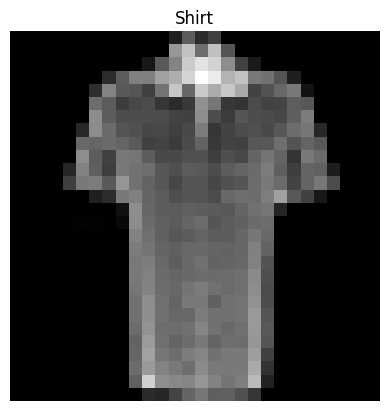

In [17]:
# Show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label},label size:{label.shape}")



### 3.Model 0 :Build a BaseLine model

In [18]:
# Create a flatten layer
flatten_model=nn.Flatten()
# Get a single frame
x=train_features_batch[0]
x.shape
# Flatten the sameple
output=flatten_model(x) # perform the forward pass 

#Printing out what happened:
print(f"Shape before Flattenning:{x.shape}")
print(f"Shape after flattening:{output.shape}")



Shape before Flattenning:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


In [19]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hiddenunits:int,output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hiddenunits),
            nn.Linear(in_features=hiddenunits,out_features=output_shape)

        )

    def forward(self,x):
        return self.layer_stack(x)


In [21]:
torch.manual_seed(42)
# Setup model with input parameters
model_0=FashionMNISTModelV0(
   input_shape=28*28,
   hiddenunits=10,
   output_shape=len(class_names)
)

In [22]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss,optimizer and evaluation metrics

In [25]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc



In [26]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


### Creating a function to timeup our experiments.

In [42]:
from timeit import default_timer as timer  
def print_train_time(start:float,end:float,device:torch.device=None):
    """Prints Difference between start and end time"""
    total_time=end-start
    print(f"Total time on {device}:{total_time:.3f} seconds")
    return total_time


In [43]:
start_time=timer()
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Total time on cpu:0.000 seconds


2.3600005079060793e-05

In [ ]:
## Import tqd for progress bar 
from tqdm.auto import tqdm 

torch.maual_seed(42)
train_time_start_on_cpu=timer()

epochs=3

# Create training and testing loop 
for epoch in tqdm((range(epochs))):
    print(f"Epoch :{epoch}\n----")
    ## Training 
    train_loss=0

    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()

        y_pred=model_0(X)

        loss=loss_fn(y_pred,y)
        train_loss=train_loss+loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch%400 ==0:
            print(f"Looked at {batch *len(X)}/{len(train_dataloader.dataset)} samples.")

        #Divide total train loss by length of train dataloader 
        train_loss=train/len(train_dataloader)

        ## Testing 
        test_loss,test_acc=0,0
        model_0.eval()
        with torch.inference_mode():
            for X_test,y_test in test_dataloader:
                # Forward pass 
                test_pred=model_0(X_test)
                test_loss=test_loss+loss_fn(test_pred,y_test)
                









    

     

